In [10]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import itertools

In [2]:
def generate_binary_strings(length):
    return [''.join(bits) for bits in itertools.product('01', repeat=length)]

In [3]:
def correlation(sequence1, sequence2):
    res = 0
    for i in range(1, min(len(sequence1), len(sequence2)) + 1):
        if sequence1[-i:] == sequence2[:i]:
            res += 2 ** i
    return res

In [4]:
# odds of sequence 'a' winning
def conway(sequence1, sequence2):
    return (correlation(sequence2, sequence2) - correlation(sequence2, sequence1)) / (correlation(sequence1, sequence1) - correlation(sequence1, sequence2))

In [5]:
def find_optimal(sequence):
    length = len(sequence)
    binary_str_list = generate_binary_strings(length)
    res = []
    max_odds = 0
    for binary_string in binary_str_list:
        if binary_string != sequence:
            odds = conway(binary_string, sequence)
            if odds > max_odds:
                max_odds = odds
                res.clear()
                res.append(binary_string)
            elif odds == max_odds:
                res.append(binary_string)
    return res, max_odds

In [6]:
binary_strings_list = generate_binary_strings(4) ## length of string
print("seq  ", "optimal  ", "odds")
for seq in binary_strings_list:
    print(seq, find_optimal(seq)[0], find_optimal(seq)[1])

seq   optimal   odds
0000 ['1000'] 15.0
0001 ['1000'] 7.0
0010 ['0001'] 2.0
0011 ['0001'] 2.0
0100 ['1010'] 1.8
0101 ['0010'] 2.5
0110 ['0011'] 2.0
0111 ['0011'] 2.0
1000 ['1100'] 2.0
1001 ['1100'] 2.0
1010 ['1101'] 2.5
1011 ['0101'] 1.8
1100 ['1110'] 2.0
1101 ['1110'] 2.0
1110 ['0111'] 7.0
1111 ['0111'] 15.0


In [7]:
n = 9
binary_strings_list = generate_binary_strings(n)
auto_correlation_list = []
correlation_list = []
for a in binary_strings_list:
    auto_correlation_list.append(correlation(a, a))
    for b in binary_strings_list:
        correlation_list.append(correlation(a, b))

In [8]:
for item in sorted(Counter(auto_correlation_list).items()):
    print(f"{item[0]}: {item[1]}")

512: 148
514: 154
516: 60
518: 46
520: 28
522: 12
526: 12
528: 12
530: 12
532: 4
542: 2
546: 10
550: 2
584: 4
586: 2
682: 2
1022: 2


(array([448.,  40.,   2.,  12.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 512. ,  522.2,  532.4,  542.6,  552.8,  563. ,  573.2,  583.4,
         593.6,  603.8,  614. ,  624.2,  634.4,  644.6,  654.8,  665. ,
         675.2,  685.4,  695.6,  705.8,  716. ,  726.2,  736.4,  746.6,
         756.8,  767. ,  777.2,  787.4,  797.6,  807.8,  818. ,  828.2,
         838.4,  848.6,  858.8,  869. ,  879.2,  889.4,  899.6,  909.8,
         920. ,  930.2,  940.4,  950.6,  960.8,  971. ,  981.2,  991.4,
        1001.6, 1011.8, 1022. ]),
 <BarContainer object of 50 artists>)

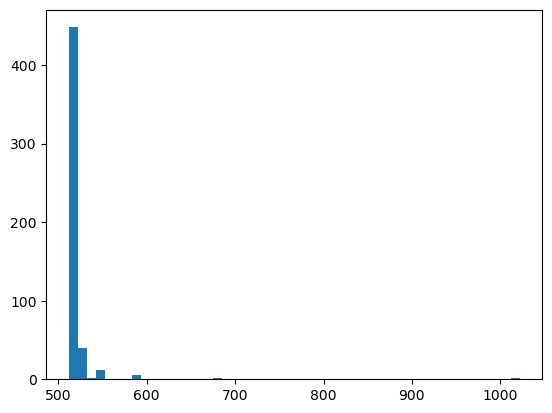

In [11]:
plt.hist(auto_correlation_list, bins = 50)

In [12]:
np.mean(auto_correlation_list)

520.0

(array([2.44992e+05, 8.66600e+03, 4.80000e+02, 4.21800e+03, 1.20000e+02,
        0.00000e+00, 1.98400e+03, 9.60000e+01, 3.00000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 9.04000e+02, 1.04000e+02, 2.40000e+01,
        0.00000e+00, 8.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.00000e+00,
        4.84000e+02, 1.80000e+01, 0.00000e+00, 6.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([   0.  ,   20.44,   40.88,   61.32,   81.76,  102.2 ,  122.64,
         143.08,  163.52,  183.96,  204.4 ,  224.84,  245.28,  265.72,
         286.16,  306.6 ,  327.04,  347.48,  367.92,  388.36,  408.8 ,
         429.24,  449.68,  470.12,  490.56,  511.  ,  5

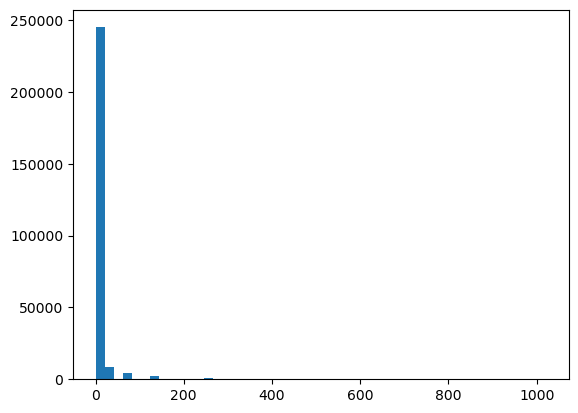

In [13]:
plt.hist(correlation_list, bins = 50)

In [ ]:
np.mean(correlation_list)